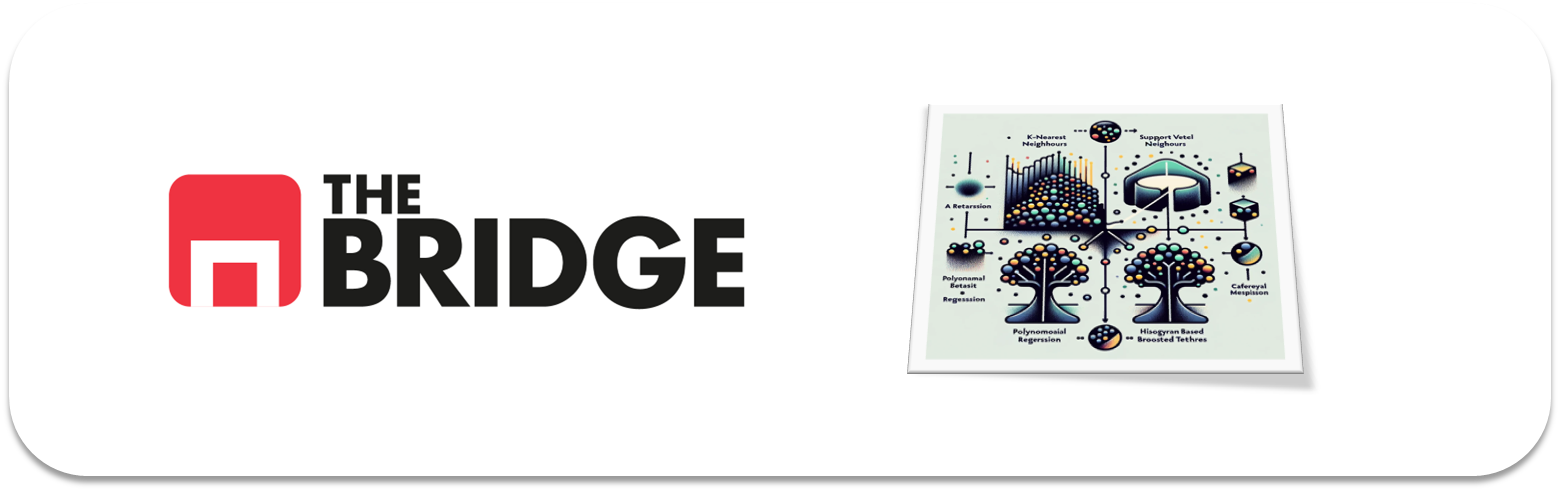

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [60]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [61]:
df_finance=pd.read_csv("./data/credit_npo.csv")
df_finance.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [62]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [63]:
df_finance.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10764
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11547
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

| **Variable**                               | **nunique** | **Tipo**         | **Descripción**                                                         |
|--------------------------------------------|-------------|---------------------------|----------------------------------------------------------------------------------|
| `SeriousDlqin2yrs`| 2 | Categórica (binaria)       | Indica si la persona ha experimentado dificultades financieras en los últimos 2 años (0 = No, 1 = Sí). Es la variable target. |
| `RevolvingUtilizationOfUnsecuredLines`| 10764| Numérica continua          | Proporción de líneas de crédito renovables no aseguradas utilizadas por el solicitante (valor entre 0 y 1 o más). |
| `age`| 78          | Numérica discreta          | Edad del solicitante en años. Valores únicos sugieren una amplia distribución. |
| `NumberOfTime30-59DaysPastDueNotWorse` | 10          | Numérica discreta (categorizable)         | Número de veces que un solicitante ha estado 30-59 días en mora en los pagos. |
| `DebtRatio`                                 | 11547       | Numérica continua          | Ratio de deuda calculado como deuda total mensual dividida por ingresos mensuales. |
| `MonthlyIncome`                             | 4167        | Numérica continua          | Ingresos mensuales declarados del solicitante. |
| `NumberOfOpenCreditLinesAndLoans`           | 43          | Numérica discreta          | Número total de líneas de crédito y préstamos abiertos |
| `NumberOfTimes90DaysLate`                   | 13          | Numérica discreta  (categorizable)         | Número de veces que el solicitante ha estado 90 días o más en mora en sus pagos. |
| `NumberRealEstateLoansOrLines`|16| Numérica discreta (categorizable) |Número de préstamos o líneas de crédito relacionadas con bienes raíces (hipotecas,...) |
| `NumberOfTime60-89DaysPastDueNotWorse`       | 8  | Numérica discreta (categorizable)          | Número de veces que el solicitante ha estado 60-89 días en mora en los pagos sin ser peor. |
| `NumberOfDependents`    | 10          | Numérica discreta (categorizable)          | Número de personas dependientes economicamente del solicitante (hijos, personas a su cargo, etc.). |


In [64]:
#Voy a tratar las categorizables como categoricas
features_cat=[]
for col in df_finance:
    if df_finance[col].nunique() < 18:
        features_cat.append(col)
features_cat.remove('SeriousDlqin2yrs')
features_cat

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [65]:
features_num=[]
for col in df_finance:
    if df_finance[col].nunique() > 18:
        features_num.append(col)
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [66]:
target='SeriousDlqin2yrs'

Problema de clasificacion

### #1.3
Pinta la distribución de frecuencias del target y coméntala

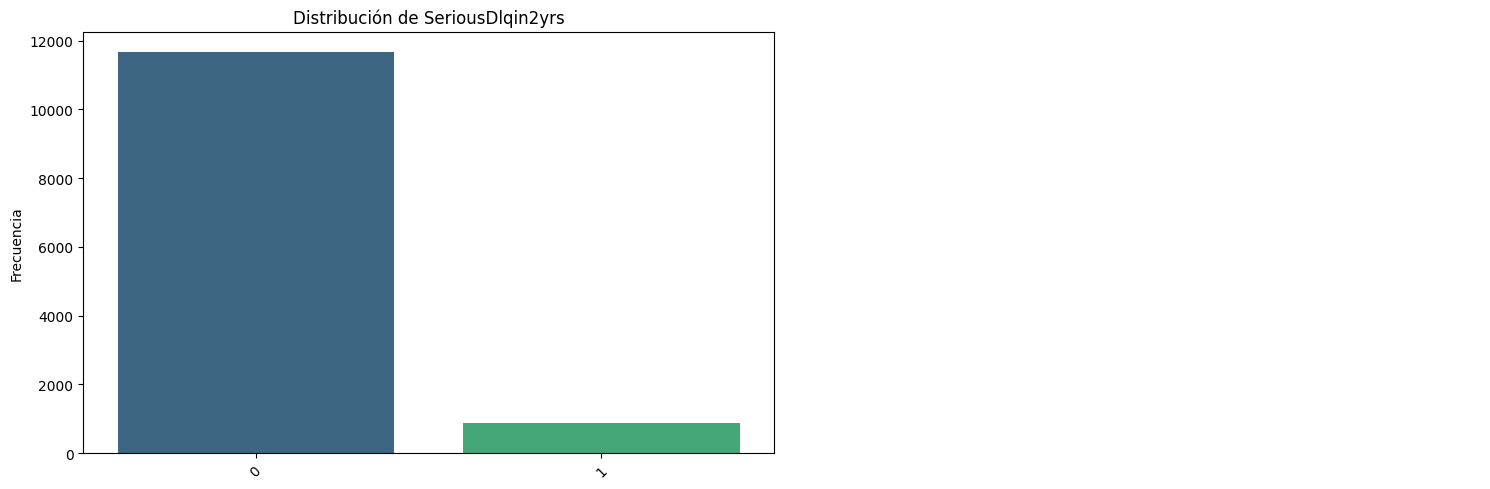

In [67]:
bt.pinta_distribucion_categoricas(df_finance,[target])

In [68]:
#Esta muy descompensada, va a haber que usar alguna tecnica de compensación

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [69]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [70]:
# Quitando todas las filas con algun nulo no pierdo ni un 10% de los datos, procedo a hacerlo
df_finance=df_finance.dropna(axis="index")
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [71]:
X = df_finance.drop(columns=[target])
y = df_finance[target]

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9452, 10)
(2364, 10)
(9452,)
(2364,)


In [73]:
train_set=pd.concat([X_train,y_train],axis=1)
train_set

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
11145,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0,0
2012,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0,0
5428,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0,0
12130,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0,0
36,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11966,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0,0
5512,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0,0
5719,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0,0
922,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0,0


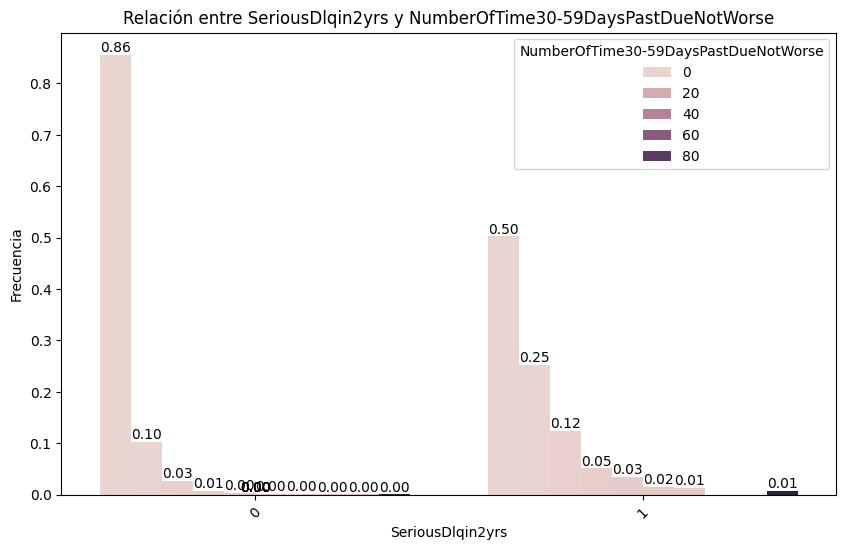

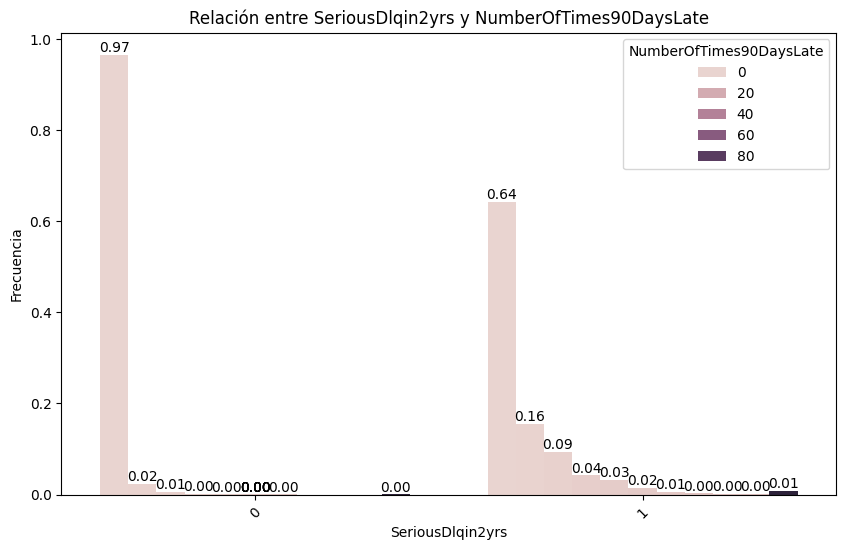

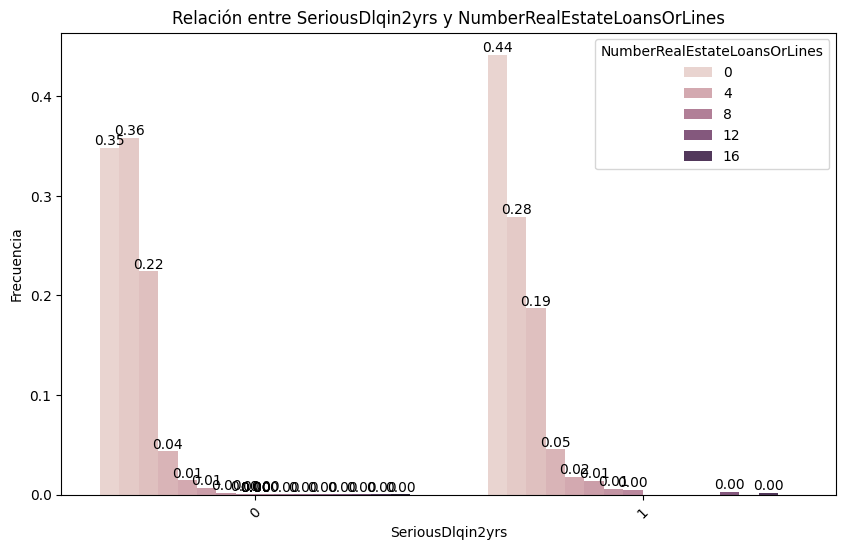

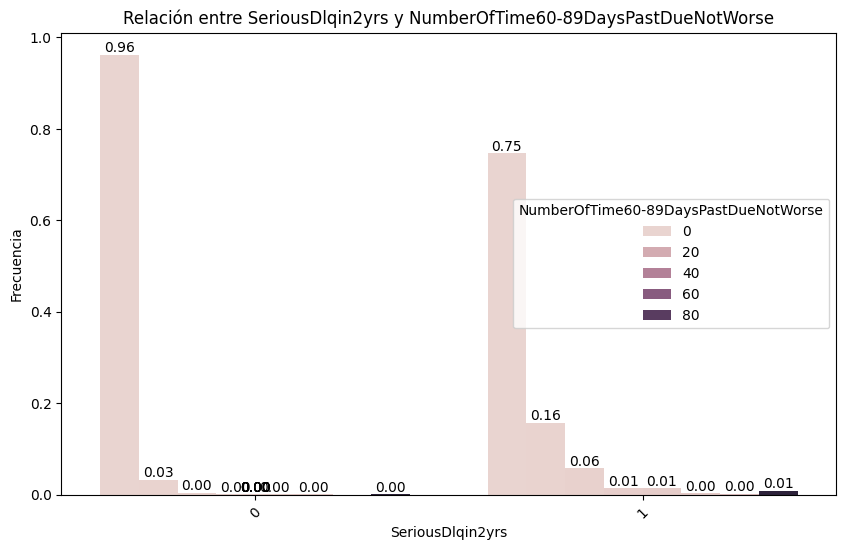

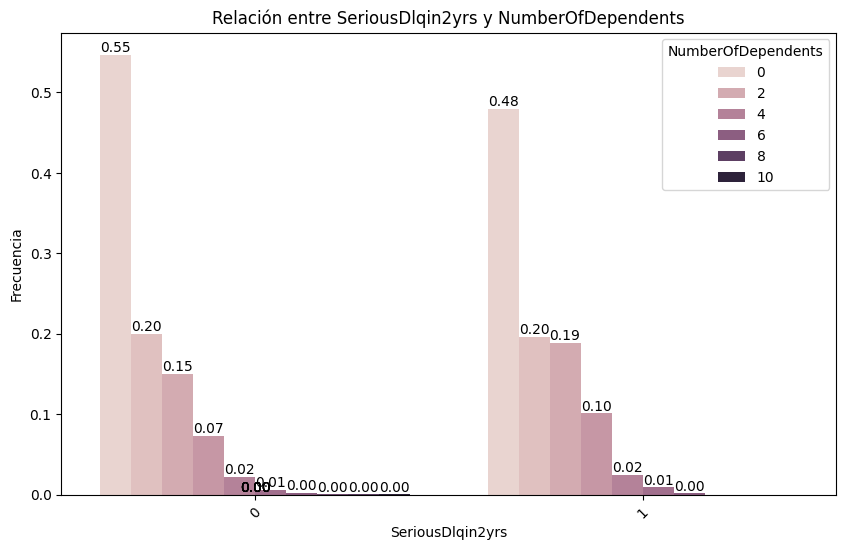

In [74]:
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

In [75]:
#todas las categoricas parecen interesantes en primera instancia

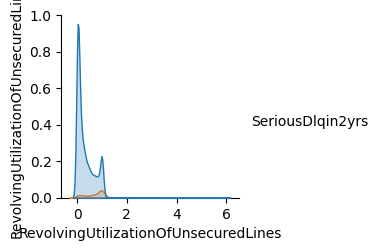

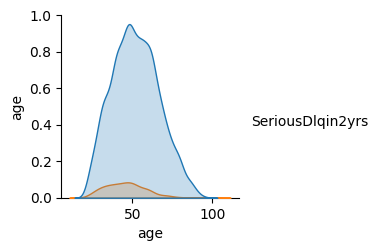

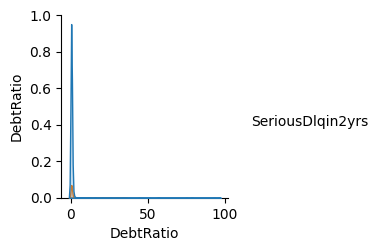

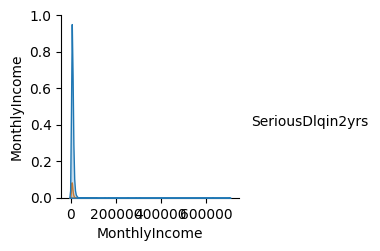

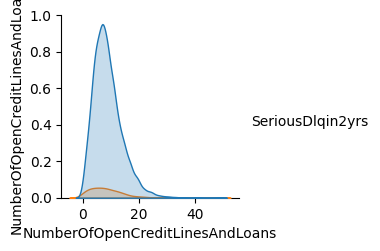

In [76]:
#Atendemos a las feature_num
for feature in features_num:
    sns.pairplot(train_set[[feature] + [target]], hue = target)

In [77]:
#No consigo ver bien las distribuciones voy a probar a balancear las clases con smote y vuelvo a mirar.

In [78]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [79]:
train_set_smote=pd.concat([X_train_smote,y_train_smote],axis=1)

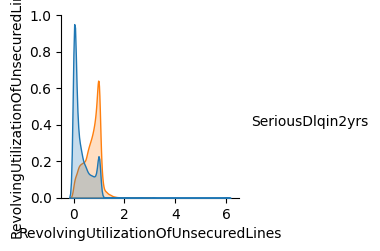

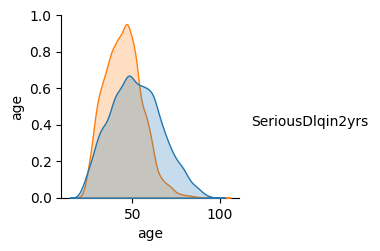

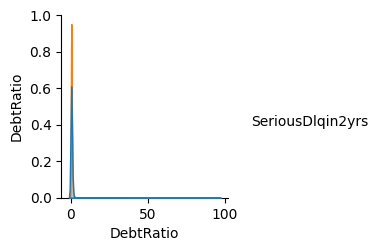

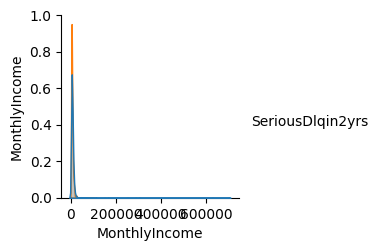

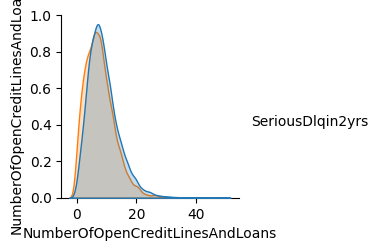

In [80]:
for feature in features_num:
    sns.pairplot(train_set_smote[[feature] + [target]], hue = target)

In [81]:
#De las numericas NumberOfOPenCreditLinesAndLoans parece que tiene una distribución muy igualitaria para ambos valores de la variable target (puede ser prescindible)

array([[<Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'DebtRatio'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: >]], dtype=object)

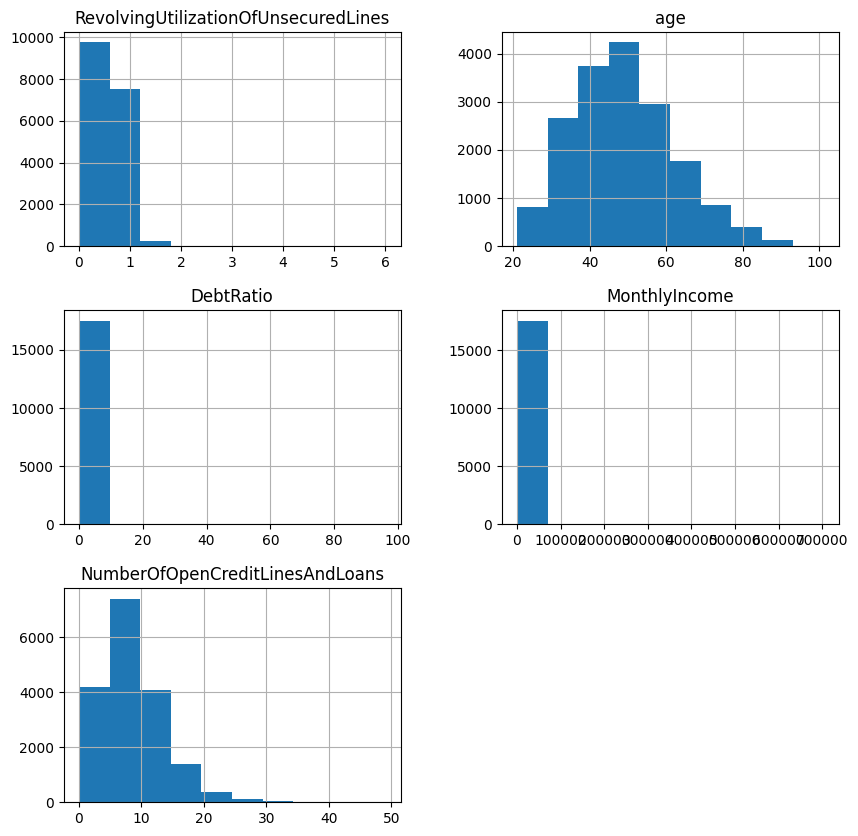

In [82]:
X_train_smote[features_num].hist(figsize=(10,10))

array([[<Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'DebtRatio'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>, <Axes: >]],
      dtype=object)

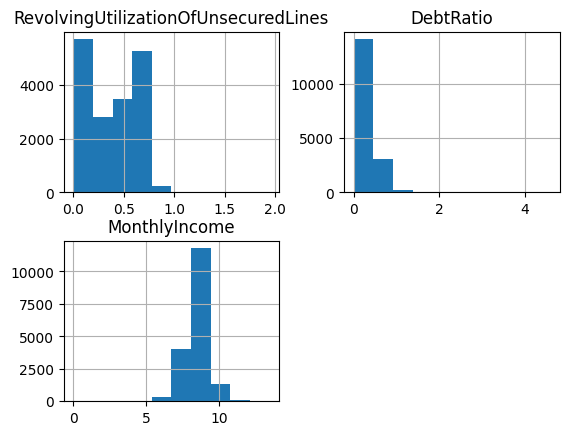

In [83]:
import numpy as np

features_to_log = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']

# Aplicar transformación logarítmica
X_train_smote[features_to_log] = np.log1p(X_train_smote[features_to_log])
X_test[features_to_log] = np.log1p(X_test[features_to_log])

X_train_smote[features_to_log].hist()

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote) 
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [88]:
modelos = {
    "KNN": (KNeighborsClassifier(n_neighbors=5), X_train_smote_scaled),
    "RandomForest": (RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42), X_train_smote),
    "CatBoost": (CatBoostClassifier(depth=5, iterations=100, verbose=0, random_seed=42), X_train_smote)
}

In [89]:
metricas_cv = {}
valores = []
for name, (model, X_train_input) in modelos.items():
    print(f"{name}")
    metricas_cv[name] = cross_val_score(model, X_train_input, y_train_smote, cv=5, scoring="recall_macro")
    valores.append(np.mean(metricas_cv[name]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

KNN
RandomForest
CatBoost


In [91]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, recall_macro: {valores}")
print(f"El ganador es {ganador}")

Model <KNN>, recall_macro: [0.85409556 0.85324232 0.85068259 0.85464335 0.85175696]
Model <RandomForest>, recall_macro: [0.79607509 0.81001138 0.80631399 0.81366748 0.82046979]
Model <CatBoost>, recall_macro: [0.82565415 0.91069397 0.90671217 0.90383825 0.92091216]
El ganador es CatBoost


In [92]:
#Procedo a optimizar catboost
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 300, 500],  
    'depth': [4, 5, 6],  
    'learning_rate': [0.1,0.4,0.7], 
    'l2_leaf_reg': [1, 3, 5],  
    'border_count': [32, 64, 128],  
    'random_seed':[42]
}

cat_optimo = CatBoostClassifier(verbose=0, random_seed=42)

grid_search = GridSearchCV(
    estimator=cat_optimo,
    param_grid=param_grid,
    scoring='recall_macro',  
    cv=4,  
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002D7A0EB0590>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 5, 6],
                         'iterations': [100, 300, 500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.4, 0.7],
                         'random_seed': [42]},
             scoring='recall_macro')

In [94]:
parametros_optimos=grid_search.best_params_
parametros_optimos

{'border_count': 128,
 'depth': 6,
 'iterations': 500,
 'l2_leaf_reg': 1,
 'learning_rate': 0.4,
 'random_seed': 42}

In [100]:
grid_search.best_score_

0.9360532219260029

In [96]:
cat_optimizado=CatBoostClassifier(**parametros_optimos, verbose=0)
cat_optimizado.fit(X_train_smote, y_train_smote)

In [97]:
cat_optim_predict = cat_optimizado.predict(X_test)

In [98]:
print(classification_report(y_test,cat_optim_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2197
           1       0.30      0.28      0.29       167

    accuracy                           0.90      2364
   macro avg       0.62      0.62      0.62      2364
weighted avg       0.90      0.90      0.90      2364



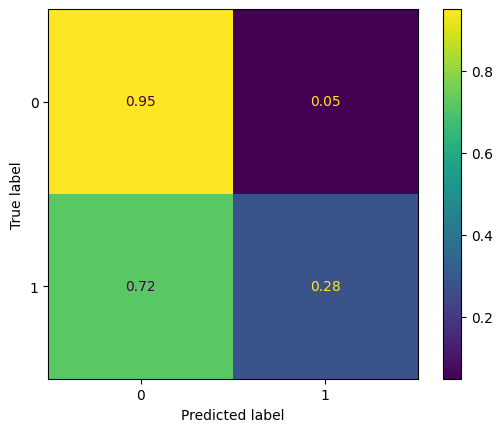

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, cat_optim_predict, normalize="true")


In [ ]:
#Tengo demasiados falsos negativos, solo un 0.28 de acertados en la clase positiva. Sin embargo es mejor recall,macro medio
#Podríamos mejorar este valor a costa de precisión utilizando para el grid_search un scoring que mejore el recall de la clase positiva